In [2]:
import numpy as np
import netCDF4
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime

In [3]:
# path = "../data/utci_sapporo_2011-2020.nc"
path = "../data/utci_budapest_2013-2022.nc"
ncfile = netCDF4.Dataset(path)

In [4]:
utci = ncfile["utci"][:,:,:] - 273.15
time = ncfile["time"][:]

In [33]:
utci.shape
ndays = 10
nyears = 10

In [34]:
dt = 2
hours = [np.mod(i+dt,24) for i in range(24)]

In [35]:
utci_reshaped = np.empty((24,ndays,nyears,3,3))
for iyear in range(nyears):
    for iday in range(ndays):
        r = np.arange(iyear*ndays*24+iday*24,iyear*ndays*24+(iday+1)*24)
        utci_reshaped[:,iday,iyear,:,:] = utci[r,:,:]

# PLOT

Text(0.0, 1.0, 'Budapest UTCI climatology, Aug 19-28, 2013 to 2022')

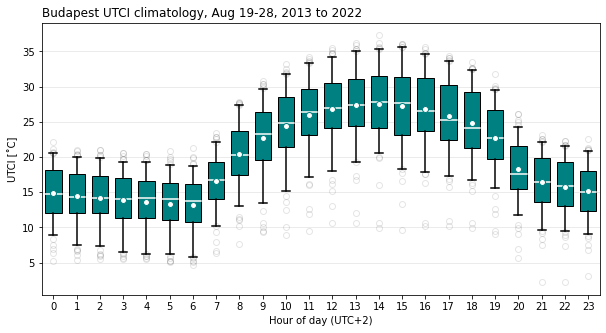

In [37]:
fig,ax = plt.subplots(figsize=(10,5))

for i in range(24):
    d = plt.boxplot(utci_reshaped[i,:10,:,1,1].flatten(),vert=True,positions=[hours[i]],widths=[0.7],
                showmeans=True, showfliers=True,patch_artist=True,whis=(5,95),
                medianprops={"color": "white", "linewidth": 1.5},
                meanprops={"markerfacecolor": "white", "markeredgecolor": "teal", "marker": "o"},
                whiskerprops={"color": "k", "linewidth": 1.5},
                boxprops={"facecolor": "teal"},
                capprops={"color": "k", "linewidth": 1.5},
                flierprops={"alpha": 0.1})
    
ax.set_xlim(-0.5,23.5)
ax.set_xlabel("Hour of day (UTC+2)")
ax.set_ylabel("UTCI [˚C]")
ax.grid(alpha=0.3,axis="y")
plt.title("Budapest UTCI climatology, Aug 19-28, 2013 to 2022",loc="left")